<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
import warnings 
import os
from dotenv import load_dotenv
pio.renderers.default = "png" # Для корректного отображения в github
warnings.filterwarnings("ignore") # Игнорирование пердупрежжений 

In [2]:
load_dotenv()

DBNAME = os.getenv('DBNAME')
USER = os.getenv('USER')
PASSWORD = os.getenv('PASSWORD')
HOST = os.getenv('HOST')
PORT = os.getenv('PORT')

In [3]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [4]:
# текст запроса
query_3_1 = f'''
select count(*) from vacancies 
'''

In [5]:
# результат запроса
result_3_1 = pd.read_sql_query(query_3_1, connection).iloc[0,0]
result_3_1

49197

2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [6]:
# текст запроса
query_3_2 = f'''
select count(*) from employers 
'''

In [7]:
# результат запроса
result_3_2 = pd.read_sql_query(query_3_2, connection).iloc[0,0]
result_3_2

23501

3. Посчитате с помощью запроса количество регионов (таблица areas).

In [8]:
# текст запроса
query_3_3 = f'''
select count(*) from areas 
'''

In [9]:
# результат запроса
result_3_3 = pd.read_sql_query(query_3_3, connection).iloc[0,0]
result_3_3

1362

4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [10]:
# текст запроса
query_3_4 = f'''
select count(*) from industries 
'''

In [11]:
# результат запроса
result_3_4 = pd.read_sql_query(query_3_4, connection).iloc[0,0]
result_3_4

294

***

### Предварительный анализ:
- Количество вакансий - 49197
- Количество работодателей - 23501
- Количество регионов - 1362
- Количество сфер деятельности - 294

### Выводы:
- Работодатели в среднем оставляют по 2 вакансии
- На одну сферу дейтельности в среднем размещено 167 вакансий, что указывает на высокую потребность в специалистах



# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [12]:
# текст запроса
query_4_1 = f'''
select 
    a.name, count(*) as cnt
from vacancies v
    join areas a on v.area_id=a.id 
group by a.name
order by cnt desc
'''

In [13]:
# результат запроса
result_4_1 = pd.read_sql_query(query_4_1, connection)
result_4_1

,name,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
764,Тарко-Сале,1
765,Новоаннинский,1
766,Бирск,1
767,Сасово,1


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [14]:
# текст запроса
query_4_2 = f'''
select 
    count(*)
from vacancies
where salary_from is not null or salary_to is not null -- где нижняя и верхняя зарплаты заполнены
'''

In [15]:
# результат запроса
result_4_2 = pd.read_sql_query(query_4_2, connection).iloc[0, 0]
result_4_2

24073

3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [16]:
# текст запроса
query_4_3 = f'''
select 
    round(avg(salary_from)) as low,
    round(avg(salary_to)) as high
from vacancies
'''

In [17]:
# результат запроса
result_4_3 = pd.read_sql_query(query_4_3, connection)
result_4_3

,low,high
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [18]:
# текст запроса
query_4_4 = f'''
select 
    schedule,
    employment,
    count(*) as cnt
from vacancies
group by schedule, employment
order by cnt desc
'''

In [19]:
# результат запроса
result_4_4 = pd.read_sql_query(query_4_4, connection)
result_4_4

,schedule,employment,cnt
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [20]:
# текст запроса
query_4_5 = f'''
select 
    experience,
    count(*)
from vacancies
group by experience
order by 2
'''

In [21]:
# результат запроса
result_4_5 = pd.read_sql_query(query_4_5, connection)
result_4_5

,experience,count
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

### Детальный анализ вакансий:
- Количество вакансий с указанной заработной платой - 24073
- Средняя нижняя зп - 71065, средняя верхняя зп - 110537

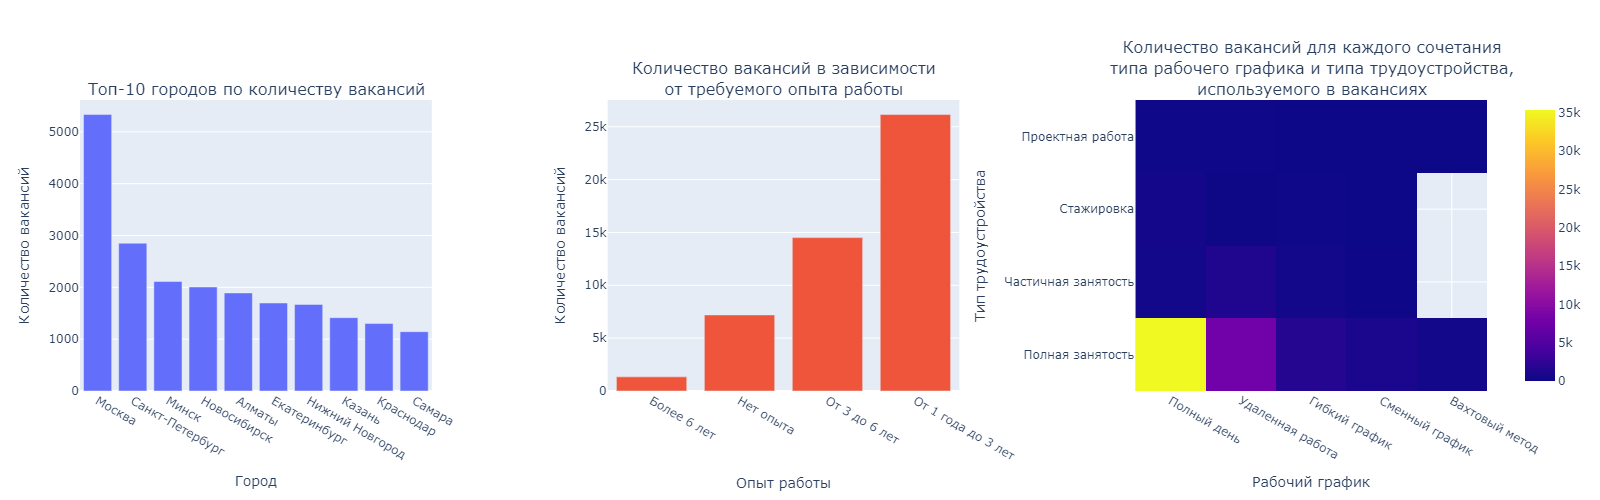

In [22]:
fig = make_subplots(rows=1, cols=3, vertical_spacing=0.1, horizontal_spacing=0.125, subplot_titles=[
    'Топ-10 городов по количеству вакансий',
    'Количество вакансий в зависимости<br>от требуемого опыта работы',
    'Количество вакансий для каждого сочетания<br>типа рабочего графика и типа трудоустройства,<br>используемого в вакансиях',
])

fig.add_trace(go.Bar(
    x=result_4_1['name'][:10], y=result_4_1['cnt'][:10], showlegend=False), row=1, col=1)
fig.add_trace(go.Bar(
    x=result_4_5['experience'], y=result_4_5['count'], showlegend=False), row=1, col=2)
fig.add_trace(go.Heatmap(
    x=result_4_4['schedule'], y=result_4_4['employment'], z=result_4_4['cnt']), row=1, col=3)

fig.update_layout(
    width=1600,
    height=500,
    margin=dict(t=100),
    xaxis1_title_text='Город',
    yaxis1_title_text='Количество вакансий',
    xaxis2_title_text='Опыт работы',
    yaxis2_title_text='Количество вакансий',
    xaxis3_title_text='Рабочий график',
    yaxis3_title_text='Тип трудоустройства',
)
fig.show()

#### Выводы
- Половина работодателей не указывают заработную плату
- Средняя верхняя зп в 1.55 раза выше чем нижняя
- Больше всего вакансий в городе Москва
- Чаще всего работодатели указывают требуемый опыт работы от 1-го до 3-х лет. Работодатели предпочитают нанимать уже опытных специалистов
- Полная занятость на полный день указана в 70% вакансий

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [23]:
# текст запроса
query_5_1 = f'''
select 
    e.*,
    count(*) as vc_cnt
from vacancies v 
    join employers e on v.employer_id=e.id
group by e.id
order by vc_cnt desc
limit 5
'''

In [24]:
# результат запроса
result_5_1 = pd.read_sql_query(query_5_1, connection)
result_5_1

,id,name,area,vc_cnt
0,1740,Яндекс,1,1933
1,2748,Ростелеком,1,491
2,78638,Тинькофф,1,444
3,3529,СБЕР,1,428
4,39305,Газпром нефть,2,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [25]:
# текст запроса
query_5_2 = f'''
select 
    a.*,
    count(e.id) as e_cnt, -- количество работодателей
    count(v.id) as v_cnt -- количество вакансий
from areas a
    left join employers e on a.id=e.area
    left join vacancies v on a.id=v.area_id
group by a.id
order by v_cnt, e_cnt desc
'''

In [26]:
# результат запроса
result_5_2 = pd.read_sql_query(query_5_2, connection)
result_5_2

,id,name,e_cnt,v_cnt
0,113,Россия,410,0
1,40,Казахстан,207,0
2,2019,Московская область,75,0
3,1438,Краснодарский край,19,0
4,16,Беларусь,18,0
...,...,...,...,...
1357,4,Новосибирск,1149438,1149438
1358,160,Алматы,1364132,1364132
1359,1002,Минск,2354880,2354880
1360,2,Санкт-Петербург,6320667,6320667


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [27]:
# текст запроса
query_5_3 = f'''
select 
    e.*,
    count(distinct v.area_id) as area_cnt -- количество уникальных регионов
from employers e 
    join vacancies v on e.id=v.employer_id
group by e.id
order by area_cnt desc
'''

In [28]:
# результат запроса
result_5_3 = pd.read_sql_query(query_5_3, connection)
result_5_3

,id,name,area,area_cnt
0,1740,Яндекс,1,181
1,2748,Ростелеком,1,152
2,5724811,Спецремонт,2,116
3,5130287,Поляков Денис Иванович,22,88
4,3682876,ООО ЕФИН,1,71
...,...,...,...,...
14901,810278,НПП Авиатрон,99,1
14902,810313,Центр дистанционных торгов,88,1
14903,810551,Городские Телекоммуникационные Системы,49,1
14904,810688,"Введенский, Отель",2,1


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [29]:
# текст запроса
query_5_4 = f'''
select 
    count(*)
from employers e 
    left join employers_industries ei on e.id=ei.employer_id
where industry_id is null
'''

In [30]:
# результат запроса
result_5_4 = pd.read_sql_query(query_5_4, connection).iloc[0, 0]
result_5_4

8419

5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [31]:
# текст запроса
query_5_5 = f'''
select 
    e.*,
    count(ei.industry_id) as ind_cnt
from employers_industries ei 
    left join employers e on e.id=ei.employer_id
    left join industries i on i.id=ei.industry_id
group by e.id
having count(ei.industry_id) = 4 -- количество сфер деятельности
order by ind_cnt desc, e.name
'''

In [32]:
# результат запроса
result_5_5 = pd.read_sql_query(query_5_5, connection)
result_5_5

,id,name,area,ind_cnt
0,800646,101 Интернет,1,4
1,763400,21vek.by,1002,4
2,64174,2ГИС,4,4
3,29890,2К,1,4
4,1980996,4 пикселя +,1,4
...,...,...,...,...
1133,24365,ЮРИОН,113,4
1134,863335,ЮТИП Технологии,72,4
1135,1430484,ЯКласс,2077,4
1136,1620049,ЯрНео,112,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [33]:
# текст запроса
query_5_6 = f'''
select
    count(distinct ei.employer_id)
from employers_industries ei
    join industries i on ei.industry_id=i.id
where i.name='Разработка программного обеспечения'
    
'''

In [34]:
# результат запроса
result_5_6 = pd.read_sql_query(query_5_6, connection).iloc[0, 0]
result_5_6

3553

7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [35]:
# код для получения списка городов-милионников
import requests
from bs4 import BeautifulSoup

response = requests.get('https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8')
soup = BeautifulSoup(response.content)

millioner_cities = [city.text for city in soup.find('table', {'class':'standard sortable'}).find('tbody').find_all('a')[5:]]
print(millioner_cities)

['Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Красноярск', 'Нижний Новгород', 'Челябинск', 'Уфа', 'Краснодар', 'Самара', 'Ростов-на-Дону', 'Омск', 'Воронеж', 'Пермь', 'Волгоград']


In [36]:
# текст запроса
query_5_7 = f'''
-- Таблица с городами-миллионниками где "Яндекс" разместил вакансии
with cities_cnt_vc as ( 
select
    a.name as name,
    count(*) as cnt
from employers e
    join vacancies v on e.id=v.employer_id
    join areas a on a.id=v.area_id
where e.name='Яндекс' and a.name in ({','.join("'" + i + "'" for i in millioner_cities)}) 
group by a.name
order by cnt)

-- Добавление общего количества вакансий в конец таблицы
select 
    * 
from cities_cnt_vc
union all
select
    'Total' as name,
    sum(cnt) as cnt
from cities_cnt_vc
'''

In [37]:
# результат запроса
result_5_7 = pd.read_sql_query(query_5_7, connection)
result_5_7

,name,cnt
0,Омск,21.0
1,Челябинск,22.0
2,Красноярск,23.0
3,Волгоград,24.0
4,Пермь,25.0
5,Казань,25.0
6,Ростов-на-Дону,25.0
7,Уфа,26.0
8,Самара,26.0
9,Краснодар,30.0


***

### Анализ работодателей:
- Количество работодетелей у которых не указана сфера деятельности - 8419
- Количество работодателей, в качестве сферы деятельности которых указана Разработка программного обеспечения - 3553

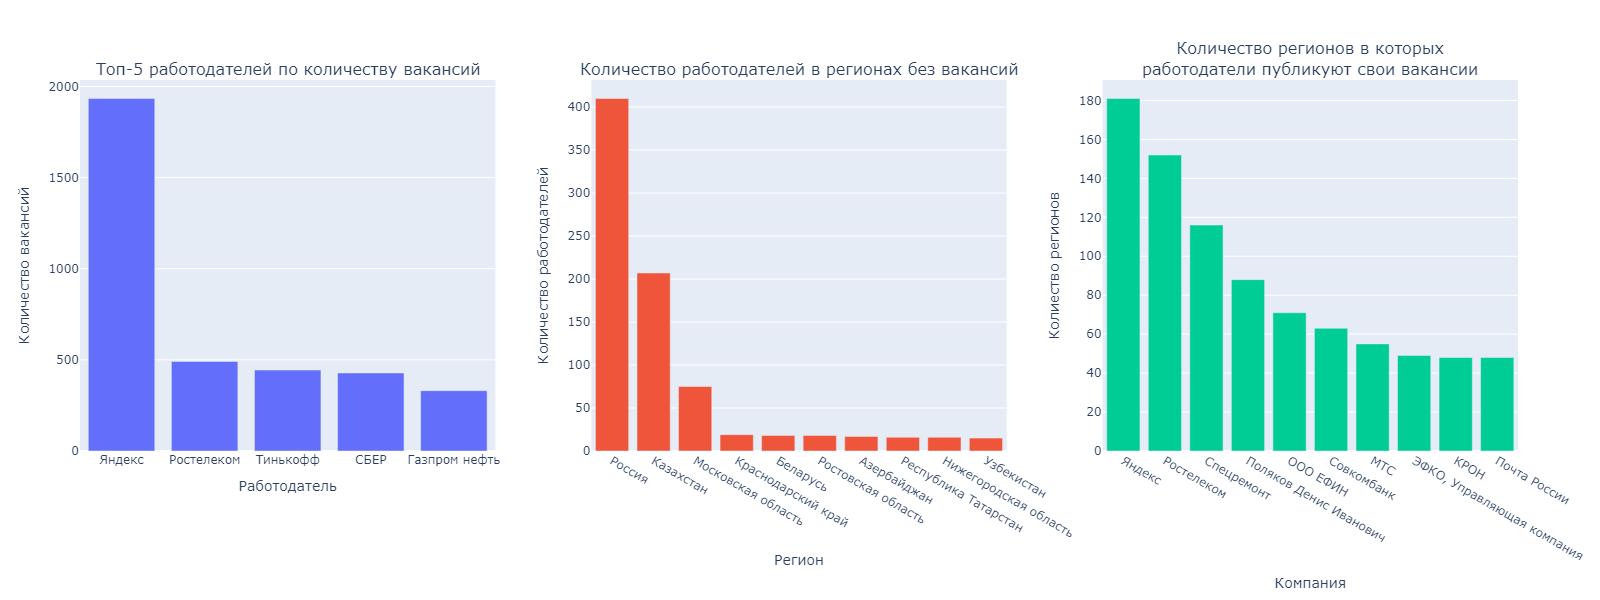

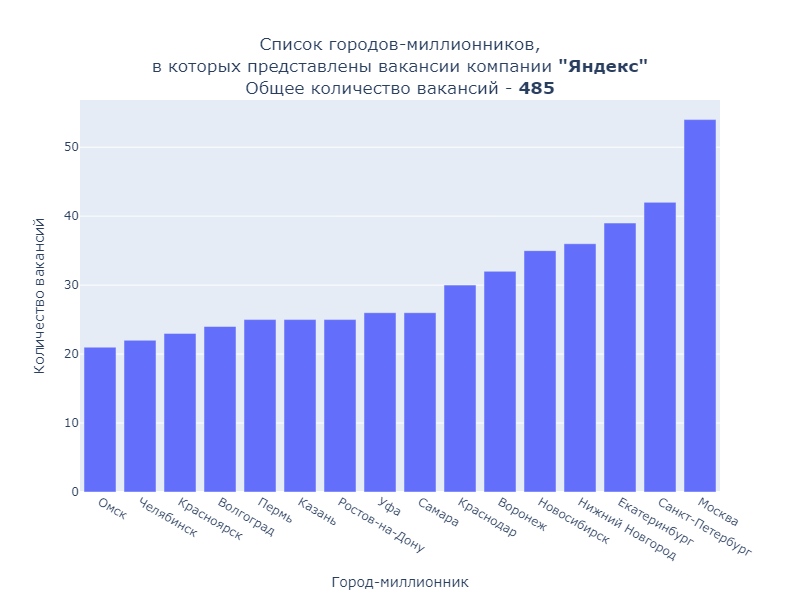

In [38]:
fig = make_subplots(rows=1,cols=3, subplot_titles=[
    'Топ-5 работодателей по количеству вакансий',
    'Количество работодателей в регионах без вакансий',
    'Количество регионов в которых<br>работодатели публикуют свои вакансии'
])
fig.add_trace(go.Bar(x=result_5_1['name'], y=result_5_1['vc_cnt']), row=1, col=1)
fig.add_trace(go.Bar(x=result_5_2['name'][:10], y=result_5_2['e_cnt'][:10]), row=1, col=2)
fig.add_trace(go.Bar(x=result_5_3['name'][:10], y=result_5_3['area_cnt'][:10]), row=1, col=3)
fig.update_layout(
    width=1600,
    height=600,
    margin=dict(t=80),
    showlegend=False,
    xaxis1_title_text='Работодатель',
    yaxis1_title_text='Количество вакансий',
    xaxis2_title_text='Регион',
    yaxis2_title_text='Количество работодателей',
    xaxis3_title_text='Компания',
    yaxis3_title_text='Колиество регионов',
)
fig.show()

fig = go.Figure()
fig.add_trace(go.Bar(x=result_5_7['name'][:-1], y=result_5_7['cnt'][:-1]))
fig.update_layout(
    width=800,
    height=600,
    title=dict(x=0.5, text=f'Список городов-миллионников,<br>в которых представлены вакансии компании <b>"Яндекс"</b><br>Общее количество вакансий - <b>{round(result_5_7['cnt'].iloc[-1])}</b>'),
    xaxis_title_text='Город-миллионник',
    yaxis_title_text='Количество вакансий',
)
fig.show()


### Выводы:
- В 36% вакансий не указана сфера деятельности
- В 15% вакансий в качестве сферы деятельности которых указана __Разработка программного обеспечения__
- Компания "Яндекс" оставляет значительно больше вакансий остальных компаний и отдаёт приоритет городам-миллионикам 

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [39]:
# текст запроса
query_6_1 = f'''
select 
    count(*)
from vacancies
where lower(name) like '%data%' or lower(name) like '%данн%'
'''

In [40]:
# результат запроса
result_6_1 = pd.read_sql_query(query_6_1, connection).iloc[0, 0]
result_6_1

1771

2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [41]:
# текст запроса
query_6_2 = f'''
select 
    count(*)
from vacancies
where (lower(name) like '%data scientist%' -- Проверка на отношение к Data-Science
    or lower(name) like '%data science%'
    or lower(name) like '%исследователь данных%'
    or (name like '%ML%' and name not like '%HTML%')
    or lower(name) like '%machine learning%'
    or lower(name) like '%машинн%обучен%')
    and (lower(name) like '%junior%' -- Проверка на начинающих 
    or experience = 'Нет опыта'
    or employment = 'Стажировка')
'''

In [42]:
# результат запроса
result_6_2 = pd.read_sql_query(query_6_2, connection).iloc[0, 0]
result_6_2

51

3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [43]:
# текст запроса
query_6_3 = f'''
select 
    count(*)
from vacancies
where (lower(name) like '%data scientist%'
    or lower(name) like '%data science%'
    or lower(name) like '%исследователь данных%'
    or (name like '%ML%' and name not like '%HTML%')
    or lower(name) like '%machine learning%'
    or lower(name) like '%машинн%обучен%')
    and (lower(key_skills) like '%sql%'
    or lower(key_skills) like '%postgres%')
'''

In [44]:
# результат запроса
result_6_3 = pd.read_sql_query(query_6_3, connection).iloc[0, 0]
result_6_3

201

4. Проверьте, насколько популярен Python в требованиях работодателей к DS. Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [45]:
# текст запроса
query_6_4 = f'''
select 
    count(*)
from vacancies
where (lower(name) like '%data scientist%'
    or lower(name) like '%data science%'
    or lower(name) like '%исследователь данных%'
    or (name like '%ML%' and name not like '%HTML%')
    or lower(name) like '%machine learning%'
    or lower(name) like '%машинн%обучен%')
    and (lower(key_skills) like '%python%')
'''

In [46]:
# результат запроса
result_6_4 = pd.read_sql_query(query_6_4, connection).iloc[0, 0]
result_6_4

351

5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [47]:
# текст запроса
query_6_5 = f'''
select 
    -- Количество ключевых навыков = Длина строки - Длина строки без знаков разделителей (табуляций) + 1
    round(avg(length(key_skills) - length(replace(key_skills, chr(9), '')) + 1), 2) as key_skills_cnt
from vacancies
where (lower(name) like '%data scientist%'
    or lower(name) like '%data science%'
    or lower(name) like '%исследователь данных%'
    or (name like '%ML%' and name not like '%HTML%')
    or lower(name) like '%machine learning%'
    or lower(name) like '%машинн%обучен%')
'''

In [48]:
# результат запроса
result_6_5 = pd.read_sql_query(query_6_5, connection)
result_6_5

,key_skills_cnt
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [49]:
# текст запроса
query_6_6 = f'''
select 
    experience,
    round(avg(case 
        when salary_from is not null and salary_to is not null -- Если оба поля заполнены
            then (coalesce(salary_from, 0) + coalesce(salary_to, 0)) / 2
        else -- Если одно из полей не заполнено
            coalesce(salary_from, 0) + coalesce(salary_to, 0)
    end)) as salary
from vacancies
where (lower(name) like '%data scientist%'
    or lower(name) like '%data science%'
    or lower(name) like '%исследователь данных%'
    or (name like '%ML%' and name not like '%HTML%')
    or lower(name) like '%machine learning%'
    or lower(name) like '%машинн%обучен%')
    and (salary_from is not null or salary_to is not null) -- Хотя бы одно поле должно быть заполнено
group by experience
'''

In [50]:
# результат запроса
result_6_6 = pd.read_sql_query(query_6_6, connection)
result_6_6

,experience,salary
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


***

### Предметный анализ:
- Количество вакансий, которые имеют отношения к Data-Science - 1771
- Количество подходящих вакансий для начинающего DS - 51
- Количество вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres - 201
- Количество вакансий для DS, в которых в качестве ключевого навыка указан Python - 351
- Количество ключевых навыков, которые в среднем указывают в вакансиях для DS - 6.41

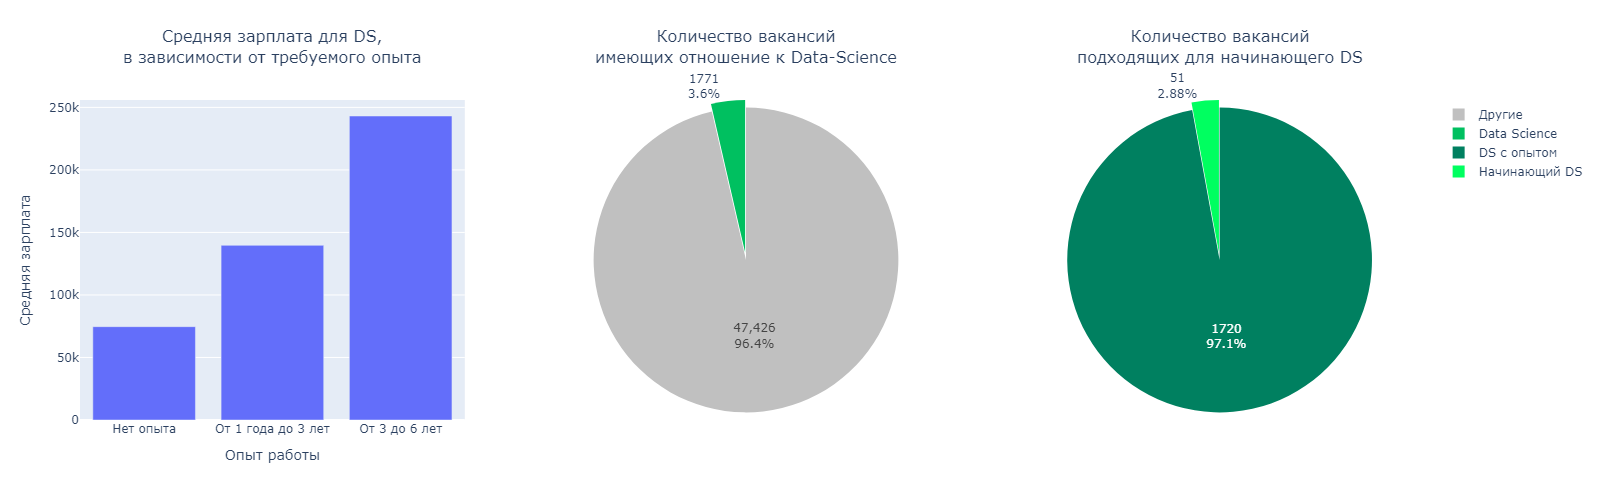

In [51]:
fig = make_subplots(rows=1, cols=3, 
                    subplot_titles=['Средняя зарплата для DS,<br>в зависимости от требуемого опыта', 
                                    'Количество вакансий<br>имеющих отношение к Data-Science', 
                                    'Количество вакансий<br>подходящих для начинающего DS'],
                    specs=[[{'type': 'bar'}, {'type': 'pie'}, {'type': 'pie'}]])

fig.add_trace(go.Bar(x=result_6_6['experience'],
              y=result_6_6['salary'], showlegend=False), row=1, col=1)
fig.add_trace(go.Pie(labels=['Другие', 'Data Science'],
                     values=[result_3_1-result_6_1, result_6_1], textinfo='value+percent',
                     marker_colors=['rgb(192, 192, 192)', 'rgb(0, 192, 96)'], pull=[0, 0.05]), row=1, col=2)
fig.add_trace(go.Pie(labels=['DS с опытом', 'Начинающий DS'],
                     values=[result_6_1-result_6_2, result_6_2], textinfo='value+percent',
                     marker_colors=['rgb(0, 128, 96)', 'rgb(0, 255, 96)'], pull=[0, 0.05]), row=1, col=3)

fig.update_layout(
    width=1600,
    height=500,
    xaxis1_title_text='Опыт работы',
    yaxis1_title_text='Средняя зарплата',
)

for i, subplot in enumerate(fig['layout']['annotations']):
    fig['layout']['annotations'][i]['y'] = 1.1


fig.show()

### Выводы:
- 3.6% вакансий имеют отношение к Data Science, что указывает на высокий спрос на специалистов в данной области
- 2.8% вакансий имеющих отношение к Data Science подходит начинающим, что указывает на высокий порог входа в профессию
- Чтобы значительно увеличить шансы на получение получение рабочего места, DS специалисту необходимо владеть минимум 6-ю навыками, в частности Python и SQL

# Дополнительное исследование и общий вывод по проекту

Работодатели по самой высокой заработной плате для DS

In [52]:
query_7_1 = f'''
select 
    e.name,
    round(avg(case 
        when v.salary_from is not null and v.salary_to is not null
            then (coalesce(v.salary_from, 0) + coalesce(v.salary_to, 0)) / 2
        else
            coalesce(v.salary_from, 0) + coalesce(v.salary_to, 0)
    end)) as salary
from vacancies v
    join employers e on v.employer_id=e.id
where (lower(v.name) like '%data scientist%'
    or lower(v.name) like '%data science%'
    or lower(v.name) like '%исследователь данных%'
    or (v.name like '%ML%' and v.name not like '%HTML%')
    or lower(v.name) like '%machine learning%'
    or lower(v.name) like '%машинн%обучен%')
    and (salary_from is not null or salary_to is not null)
group by e.id
order by salary desc
'''

# результат запроса
result_7_1 = pd.read_sql_query(query_7_1, connection)
result_7_1

,name,salary
0,Итон,450000.0
1,AppQuantum,350000.0
2,JSA Group,300000.0
3,OVISION,300000.0
4,Semrush,300000.0
5,СберЛизинг,300000.0
6,Дром,300000.0
7,Кловер Групп,275000.0
8,КИБЕР-РОМ,275000.0
9,Dbrain,275000.0


In [53]:
query_7_2 = f'''
select * from vacancies
limit 3
'''

# результат запроса
result_7_2 = pd.read_sql_query(query_7_2, connection)
result_7_2

,id,name,key_skills,schedule,experience,employment,salary_from,salary_to,area_id,employer_id
0,55312386,Компьютерный Мастер,Пользователь ПК\tРабота в команде\tРемонт ноут...,Полный день,Нет опыта,Полная занятость,64000.0,None,1516,5724811
1,55843014,Системный администратор,Средства криптографической защиты информации\t...,Полный день,От 3 до 6 лет,Полная занятость,NaN,None,130,4903713
2,54525964,Lead Java Developer to Poland,Spring Framework\tSQL\tHibernate ORM\tJava\tGit,Удаленная работа,От 3 до 6 лет,Полная занятость,NaN,None,160,69961


Самые востребованные ключевые навыки для DS


In [54]:
# текст запроса
query_7_3 = f'''
select 
    key_skills,
    count(*)
from(
    select 
        -- Ковертация строки навыков в массив -> распаковка элементов массива, чтобы посчитать количество каждого навыка
        unnest(string_to_array(key_skills, chr(9))) as key_skills 
    from vacancies
    where (lower(name) like '%data scientist%'
        or lower(name) like '%data science%'
        or lower(name) like '%исследователь данных%'
        or (name like '%ML%' and name not like '%HTML%')
        or lower(name) like '%machine learning%'
        or lower(name) like '%машинн%обучен%')
        and key_skills is not null
) as unnested_key_skills
group by key_skills
order by count(*) desc
limit 20
'''
# результат запроса
result_7_3 = pd.read_sql_query(query_7_3, connection)
result_7_3

,key_skills,count
0,Python,348
1,SQL,191
2,Machine Learning,114
3,Git,66
4,Математическая статистика,62
5,Data Analysis,54
6,Pandas,52
7,Data Science,52
8,ML,49
9,Английский язык,48


Работодатели-лидеры по количеству вакансий для начинающих DS специалистов

In [55]:
query_7_4 = f'''
select 
    e.id,
    e.name,
    count(*) as v_cnt
from vacancies v
    join employers e on v.employer_id=e.id
where (lower(v.name) like '%data scientist%'
    or lower(v.name) like '%data science%'
    or lower(v.name) like '%исследователь данных%'
    or (v.name like '%ML%' and v.name not like '%HTML%')
    or lower(v.name) like '%machine learning%'
    or lower(v.name) like '%машинн%обучен%')
    and (lower(v.name) like '%junior%'
    or experience = 'Нет опыта'
    or employment = 'Стажировка')
group by e.id
order by v_cnt desc, e.name
'''

# результат запроса
result_7_4 = pd.read_sql_query(query_7_4, connection)
result_7_4

,id,name,v_cnt
0,4181,Банк ВТБ (ПАО),10
1,675403,Comexp,3
2,976931,The Skolkovo Institute of Science and Technology,3
3,2168135,SteadyControl,2
4,4914081,Диплей,2
5,3124,"СтарЛайн, Научно-производственное объединение",2
6,168307,DINS,1
7,5920492,DNS Головной офис,1
8,2180,Ozon,1
9,1039977,Pay P.S.,1


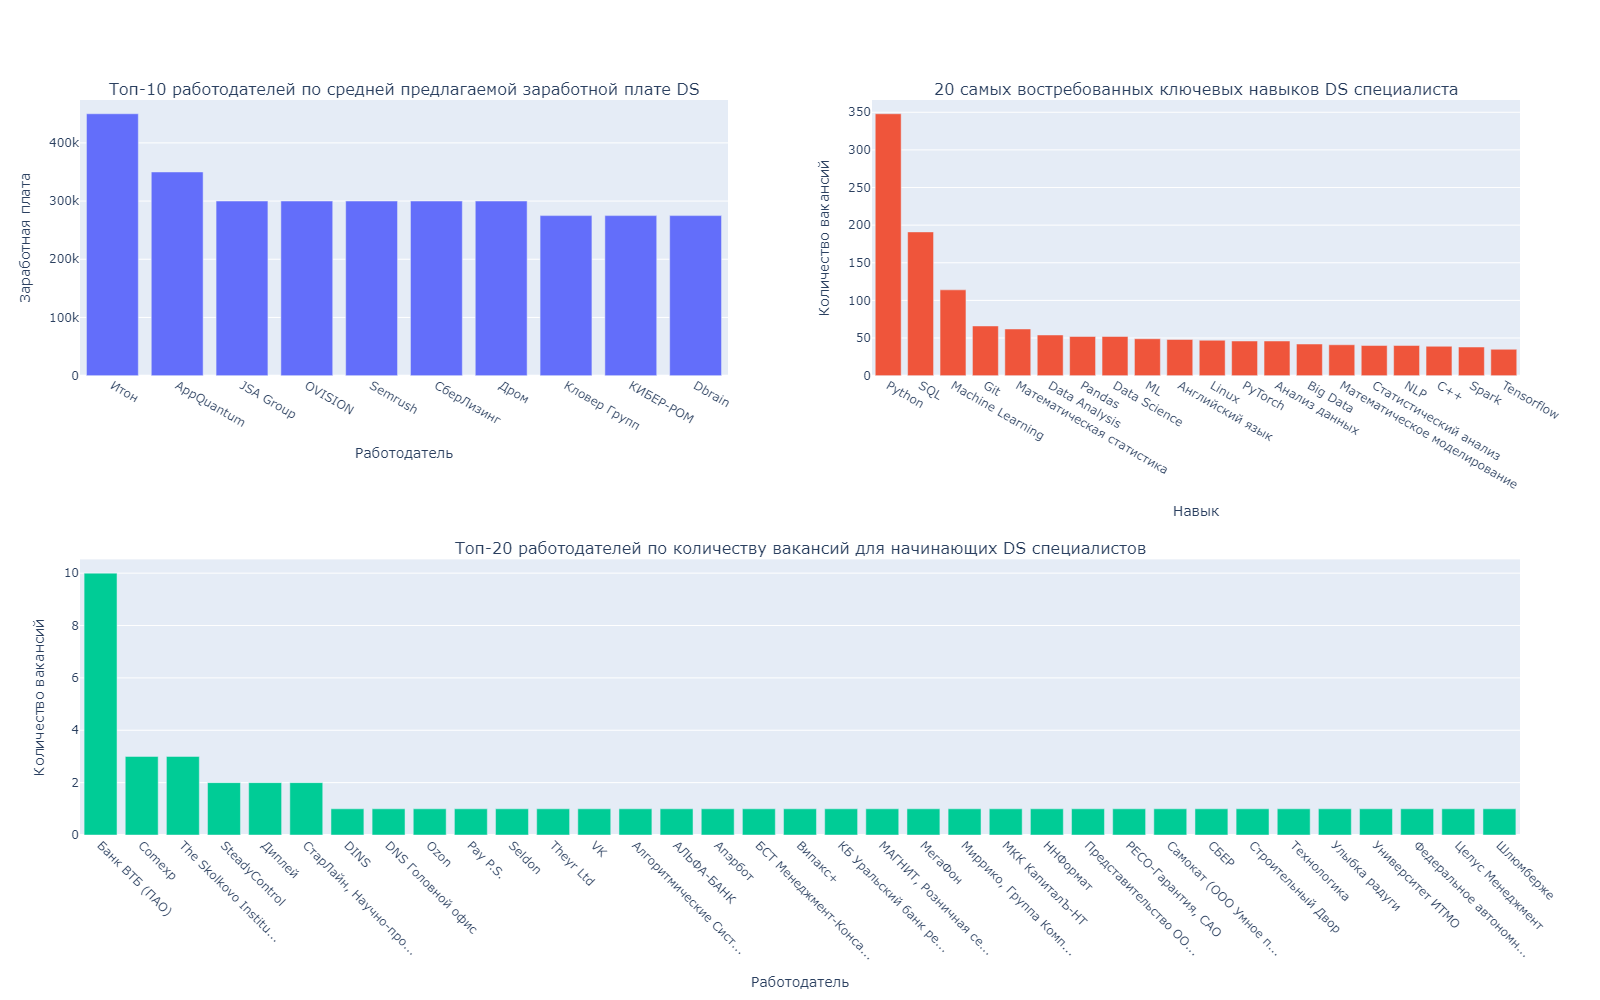

In [56]:
def limit_str(string, limit=20):
    if len(string) > limit:
        return string[:limit]+'...'
    return string

fig = make_subplots(rows=2, cols=2, subplot_titles=['Топ-10 работодателей по средней предлагаемой заработной плате DS',
                                                    '20 самых востребованных ключевых навыков DS специалиста',
                                                    'Топ-20 работодателей по количеству вакансий для начинающих DS специалистов'],
                    specs=[[{},{}], [{"colspan": 2}, None]])


fig.add_trace(go.Bar(x=result_7_1['name'][:10], y=result_7_1['salary'][:10]), row=1, col=1)
fig.add_trace(go.Bar(x=result_7_3['key_skills'], y=result_7_3['count']), row=1, col=2)
fig.add_trace(go.Bar(x=result_7_4['name'].map(limit_str), y=result_7_4['v_cnt']), row=2, col=1)

fig.update_layout(
    width=1600,
    height=1000,
    showlegend=False,
    xaxis1_title_text='Работодатель',
    yaxis1_title_text='Заработная плата',
    xaxis2_title_text='Навык',
    yaxis2_title_text='Количество вакансий',
    xaxis3_title_text='Работодатель',
    yaxis3_title_text='Количество вакансий',
    xaxis3_tickangle=45
)

fig.show()



### Общие выводы:
- В целом рынок труда нуждается в опытных специалистах, но есть возможности и у начинающих 
- DS специалист должен владеть как минимум 6-ю навыками, самые важные из них: Python, SQL, Machine Learning, GIT, Математическая статистика, Pandas и Английский язык
- Чем выше опыт работы, тем выше заработная плата